In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
x = np.linspace(0, 10, 100)
y = np.array(3*x**2+4*x+8)

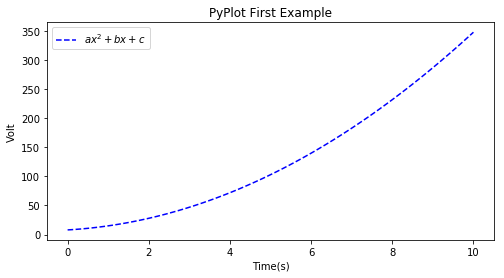

In [68]:
plt.figure(figsize=(8,4))
# plt.plot(x,y,label="$sin(x)$",color="red",linewidth=2)
# plt.scatter(x,z,label="$cos(x^2)$")
plt.plot(x,y,"b--",label="$ax^2+bx+c$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("PyPlot First Example")
# plt.ylim(0,1.2)
plt.legend()
plt.show()

In [71]:
indices=np.arange(len(x))
np.random.shuffle(indices)
frac=0.8
XTrain=[x[i] for i in indices[:int(frac*len(x))]]
YTrain=[y[i] for i in indices[:int(frac*len(x))]]
XTest=[x[i] for i in indices[int(frac*len(x)):]]
YTest=[y[i] for i in indices[int(frac*len(x)):]]

In [79]:
#转换成向量
npX=np.array([[1,i,i**2] for i in XTrain])
npY=np.array(YTest)
npTheta=np.ones(3)

In [85]:
con=0
while(1):
    con+=1
    gradient=np.zeros(3)
    loss=0
    for i in range(len(npX)):
        print(npTheta.dot(npX[i])-npY[i])
        gradient+=(npTheta.dot(npX[i])-npY[i])*npTheta
        print(gradient·
        loss+=0.5*(npTheta.dot(npX[i])-npY[i])**2
    npTheta=npTheta-alpha*gradient
    if loss<1:
        break
    if con==100:
        break
    print(npTheta)

-230.804713805
[-230.8047138 -230.8047138 -230.8047138]
7.07407407407
[-223.73063973 -223.73063973 -223.73063973]
-6.48474645444
[-230.21538619 -230.21538619 -230.21538619]
-294.869605142
[-525.08499133 -525.08499133 -525.08499133]
35.2079379655
[-489.87705336 -489.87705336 -489.87705336]
-20.9057239057
[-510.78277727 -510.78277727 -510.78277727]
-277.24691358
[-788.02969085 -788.02969085 -788.02969085]
-239.111009081
[-1027.14069993 -1027.14069993 -1027.14069993]
-0.834302622181
[-1027.97500255 -1027.97500255 -1027.97500255]
-129.721150903
[-1157.69615345 -1157.69615345 -1157.69615345]
1.86848280788
[-1155.82767065 -1155.82767065 -1155.82767065]
-233.760534639
[-1389.58820529 -1389.58820529 -1389.58820529]
-238.073359861
[-1627.66156515 -1627.66156515 -1627.66156515]
-9.69258238955
[-1637.35414754 -1637.35414754 -1637.35414754]
-0.145597388022
[-1637.49974492 -1637.49974492 -1637.49974492]
-196.213345577
[-1833.7130905 -1833.7130905 -1833.7130905]
-15.0165289256
[-1848.72961943 -1848.

IndexError: index 20 is out of bounds for axis 0 with size 20

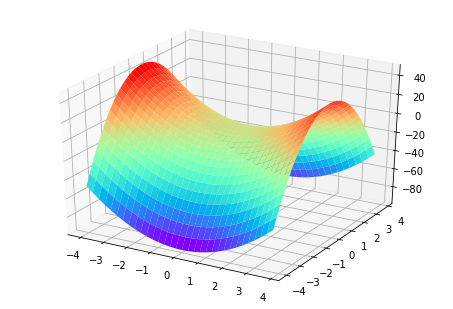

In [157]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.array(3*X**2 - 6*Y**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')

plt.show()

In [14]:
plota = np.arange(-4, 4, 0.25)
plotb = np.arange(-4, 4, 0.25)
plota, plotb = np.meshgrid(plota, plotb)

In [208]:
from itertools import combinations
train=list(combinations([0.01*i for i in range(100)], 2))
print(np.shape(train))
label=[]
for i in train:
    label.append(2*i[0]**2 -1*i[1]**2)

(4950L, 2L)


In [209]:
def PlotJ(train,label,a,b):
    J=np.zeros(np.shape(a))
    for ind,i in enumerate(train):
        Z_pre=np.array((a*i[0]**2 + b*i[1]**2))
        Z=label[ind]
        J+=(Z_pre-Z)**2
    return J/len(train)

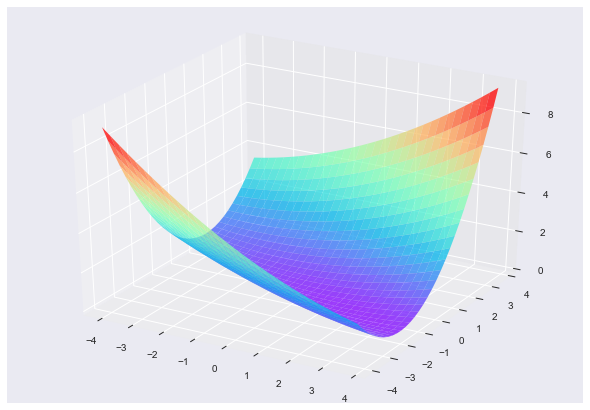

In [210]:
plotJ=PlotJ(train,label,plota,plotb)
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure()
ax = Axes3D(fig)

# 具体函数方法可用 help(function) 查看，如：help(ax.plot_surface)
ax.plot_surface(plota, plotb, plotJ, rstride=1, cstride=1, cmap='rainbow',alpha=0.75)
plt.show()

In [211]:
def dJ(train,a,b):
    tmp=a*train[0]**2+b*train[1]**2-(2*train[0]**2-train[1]**2)
    djda=tmp*train[0]**2
    djdb=tmp*train[1]**2
    return djda,djdb

In [212]:
def J(train,label,a,b):

    Z_pre=np.array((a*train[0]**2 + b*train[1]**2))
    Z =label
    J =(Z_pre-Z)**2
    return J

In [213]:
import time
import os
from functools import wraps  
def exeTime(func):
    def newFunc(*args, **args2):
        t0 = time.time()
        print "@%s, {%s} start" % (time.strftime("%X", time.localtime()), func.__name__)
        back = func(*args, **args2)
        print "@%s, {%s} end" % (time.strftime("%X", time.localtime()), func.__name__)
        print "@%.3fs taken for {%s}" % (time.time() - t0, func.__name__)
        return back
    return newFunc

In [261]:
# Batch gradient descent
@exeTime
def Batch_gradient_descent(train,a=4,b=4,tolerance=1e-3,maxiter=1000):
    pre_a=100
    pre_b=100
    alpha=1
    iteration=0

    x=[]
    y=[]
    z=[]

    while(((abs(a-pre_a)>tolerance) and abs(b-pre_b)>tolerance) and iteration<maxiter):
        iteration+=1
        J_val=0
        djda=0
        djdb=0
        for ind,i in enumerate(train):
            J_val+=J(i,label[ind],a,b)
            tmp1,tmp2=dJ(i,a,b)
            djda+=tmp1
            djdb+=tmp2
        djda=djda/len(train)
        djdb=djdb/len(train)
        # 记录每一步的位置
        x.append(a)
        y.append(b)
        z.append(J_val/len(train))
        # 记录上一步的位置，用于判断迭代终止
        pre_a=a
        pre_b=b

        # 梯度下降
        a-=alpha*djda
        b-=alpha*djdb
    print 'a:',a  
    print 'b:',b
    print 'iteration:',iteration
    return x,y,z
x,y,z=Batch_gradient_descent(train,tolerance=1e-5)

@16:11:07, {Batch_gradient_descent} start
a: 2.00107253455
b: -1.00038070203
iteration: 203
@16:11:11, {Batch_gradient_descent} end
@4.065s taken for {Batch_gradient_descent}


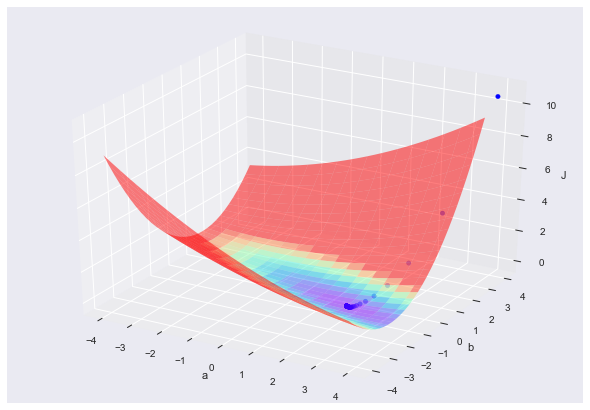

In [262]:
import scipy.io as sio
import seaborn
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(plota, plotb, plotJ,rstride=1, cstride=2,vmax=1, cmap='rainbow',alpha=0.5)


ax.set_zlabel('J') #坐标轴
ax.set_ylabel('b')
ax.set_xlabel('a')
ax.scatter(x,y,z,c='b')
plt.show()

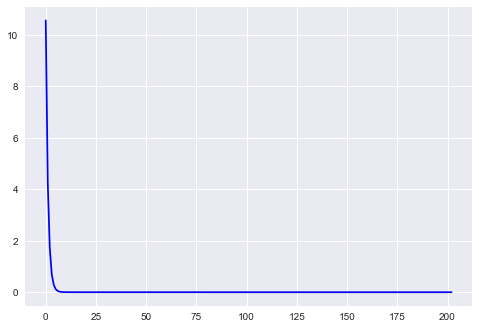

In [263]:
fig = plt.figure()

plt.plot(z,c='b')
plt.show()

In [267]:
# Batch gradient descent
@exeTime
def Stochastic_gradient_descent(train,a=4,b=4,tolerance=1e-3,maxiter=1000):
    pre_a=100;pre_b=100
    alpha=1;iteration=0
    x=[]; y=[]; z=[]
    while(((abs(a-pre_a)>tolerance) and abs(b-pre_b)>tolerance) and iteration<maxiter):
        iteration+=1
        for ind,i in enumerate(train):
            J_val=J(i,label[ind],a,b)
            djda,djdb=dJ(i,a,b)

            # 记录上一步的位置，用于判断迭代终止
            pre_a=a
            pre_b=b

            # 梯度下降
            a-=alpha*djda
            b-=alpha*djdb

            # 记录每一步的位置
            x.append(a)
            y.append(b)
            z.append(J_val)
    print 'a:',a  
    print 'b:',b
    print 'iteration:',iteration
    return x,y,z

In [268]:
x,y,z= Stochastic_gradient_descent(train,tolerance=1e-5)

@16:11:36, {Stochastic_gradient_descent} start
a: 2.00005323596
b: -1.00005398285
iteration: 2
@16:11:36, {Stochastic_gradient_descent} end
@0.070s taken for {Stochastic_gradient_descent}


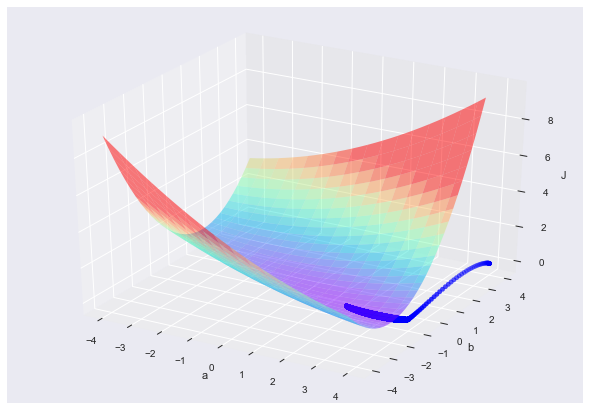

In [269]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(plota, plotb, plotJ,rstride=1, cstride=2,vmax=5, cmap='rainbow',alpha=0.5)


ax.set_zlabel('J') #坐标轴
ax.set_ylabel('b')
ax.set_xlabel('a')
ax.scatter(x,y,z,c='b')
plt.show()

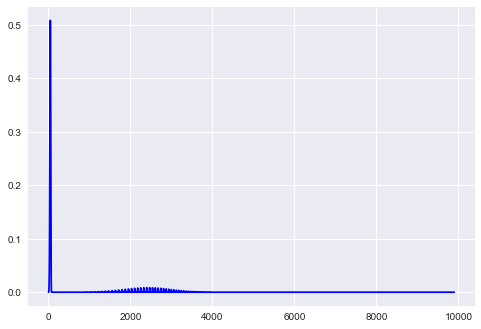

In [270]:
fig = plt.figure()

plt.plot(z,c='b')
plt.show()

In [271]:
# Mini-Batch gradient descent
@exeTime
def Mini_Batch_gradient_descent(train,batchsize=100,a=4,b=4,tolerance=1e-3,maxiter=1000):
    pre_a=100;pre_b=100
    alpha=1;iteration=0
    x=[]; y=[]; z=[]
    
    J_val=0
    djda=0
    djdb=0
    while(((abs(a-pre_a)>tolerance) and abs(b-pre_b)>tolerance) and iteration<maxiter):
        iteration+=1
        for ind,i in enumerate(train):
            J_val+=J(i,label[ind],a,b)
            tmp1,tmp2=dJ(i,a,b)
            djda+=tmp1
            djdb+=tmp2
            if ind%batchsize==0 and ind!=0:
                djda=djda/len(train)
                djdb=djdb/len(train)
                # 记录每一步的位置
                x.append(a)
                y.append(b)
                z.append(J_val/batchsize)
                
                # 记录上一步的位置，用于判断迭代终止
                pre_a=a
                pre_b=b

                # 梯度下降
                a-=alpha*djda
                b-=alpha*djdb

                J_val=0
                djda=0
                djdb=0

    print 'a:',a  
    print 'b:',b
    print 'iteration:',iteration
    return x,y,z

In [272]:
x,y,z=Mini_Batch_gradient_descent(train,batchsize=100,tolerance=1e-5)

@16:12:11, {Mini_Batch_gradient_descent} start
a: 2.0016370324
b: -1.00062235574
iteration: 208
@16:12:15, {Mini_Batch_gradient_descent} end
@4.318s taken for {Mini_Batch_gradient_descent}


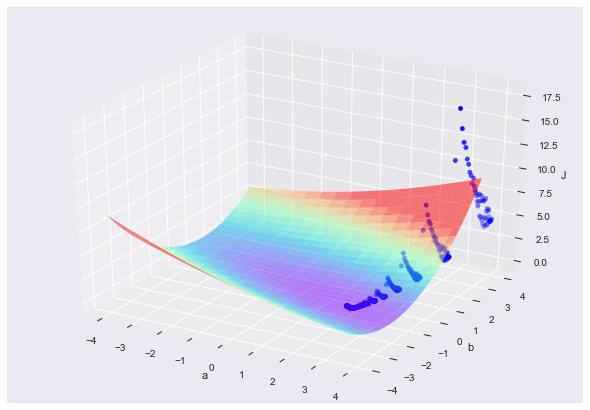

In [273]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(plota, plotb, plotJ,rstride=1, cstride=2,vmax=5, cmap='rainbow',alpha=0.5)


ax.set_zlabel('J') #坐标轴
ax.set_ylabel('b')
ax.set_xlabel('a')
ax.scatter(x,y,z,c='b')
plt.show()

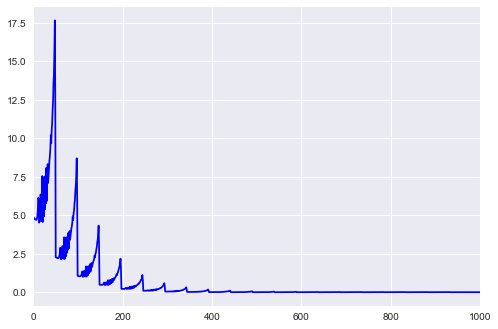

In [274]:
fig = plt.figure()

plt.plot(z,c='b')
plt.xlim(1,1000)
plt.show()

# Stochastic Gradient Descent 随机梯度下降(SGD)
